In [4]:
import sys

In [7]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
import pprint
import PIL.Image
pp = pprint.PrettyPrinter(indent=4)
from sklearn.model_selection import train_test_split

trainingdir='/data/home/team13/notebooks/training_images/'

classCount = 0
images = []
imageCodes = []
object_dict = dict()
object_dict_keys = dict()


for subdir, dirs, files in os.walk(trainingdir):
    for file in files:
        filepath = subdir + os.sep + file
        folder = subdir.rsplit('/', 1)

        if object_dict.get(folder[-1], -1) < 0:
            object_dict[folder[-1]] = classCount
            object_dict_keys[classCount] = folder[-1]            
            classCount = classCount+1
        # Use PIL to open the image
        imagePIL = PIL.Image.open(filepath)
        images.append(np.array(imagePIL).ravel())
        imageCodes.append(object_dict[folder[-1]])

features = np.array(images)
labels = np.array(imageCodes)
print('Feature Shape:',features.shape)
print('Labels Shape:',labels.shape)
print(features)

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2)

print('Training records:',Y_train.size)
print('Test records:',Y_test.size)

#print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))

Feature Shape: (2122, 49152)
Labels Shape: (2122,)
[[255 255 243 ... 255 254 248]
 [255 255 255 ... 255 255 255]
 [252 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
Training records: 1697
Test records: 425


# Train Model

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, Y_train)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=0.001, verbose=0, warm_start=False)

# Test model

In [23]:
y_pred = sgd_clf.predict(X_test)
print(np.array(y_pred == Y_test)[:])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == Y_test)/len(Y_test))


[ True  True  True  True  True  True False  True  True  True  True False
  True  True  True  True  True  True False  True  True  True  True  True
 False False False  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True False  True  True  True  True  True
  True  True  True  True  True False  True  True  True False  True  True
 False  True  True False False  True  True False  True  True  True  True
  True  True  True  True False  True  True  True  True False  True  True
  True  True  True False  True  True False  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True False  True False  True  True False  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False False  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  T

# Generate Confusion Matrix

Confusion matrix, without normalization
[[40  0  0  1  0  0  1  0  0  0  0  0]
 [ 0 13 10  1  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 31  0  0  9  0  0  0  0  0]
 [ 0  0  4  0 21  0  0  0  0  0  0  0]
 [ 1  1  3  3  0 18  2  2  0  0  0  2]
 [ 0  0  1 10  0  0 78  0  0  0  0  0]
 [ 0  1  2  0  0  0  1 58  0  0  0  0]
 [ 0  0  1  0  0  0  0  0 22  0  0  0]
 [ 0  0  7  0  0  0  2  1  0  3  0  0]
 [ 0  0  3  3  0  0  5  1  0  0  0  0]
 [ 0  0  2  1  0  0  0  0  1  0  0  9]]
Normalized confusion matrix
[[0.95 0.   0.   0.02 0.   0.   0.02 0.   0.   0.   0.   0.  ]
 [0.   0.54 0.42 0.04 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.78 0.   0.   0.23 0.   0.   0.   0.   0.  ]
 [0.   0.   0.16 0.   0.84 0.   0.   0.   0.   0.   0.   0.  ]
 [0.03 0.03 0.09 0.09 0.   0.56 0.06 0.06 0.   0.   0.   0.06]
 [0.   0.   0.01 0.11 0.   0.   0.88 0.   0.   0.   0.   0.  ]
 [0.   0.02 0.03 0.   

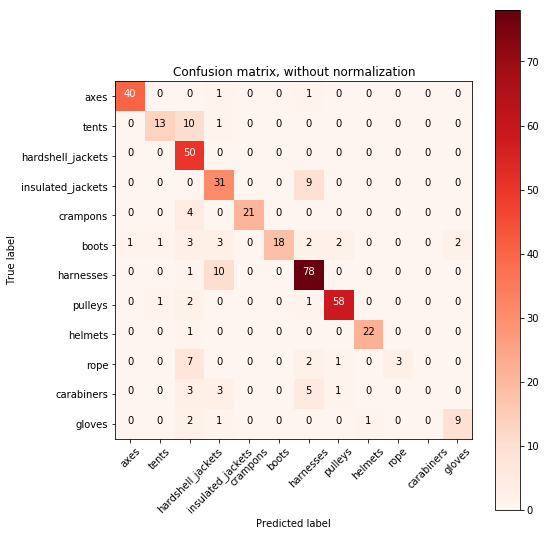

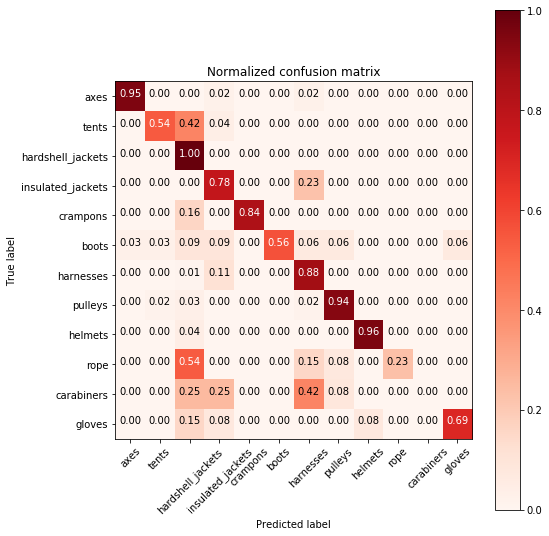

In [9]:
import itertools
from sklearn.metrics import confusion_matrix

class_names = list(object_dict)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

# Run Model Against Test Images and Print Results

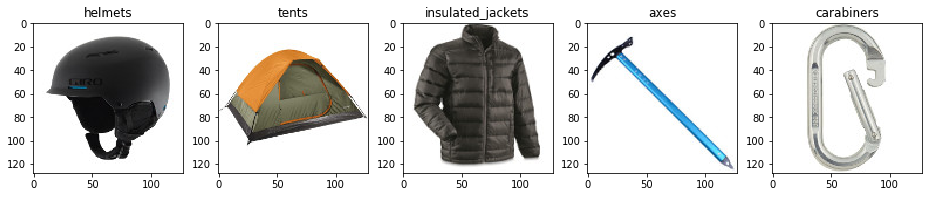

In [8]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Needed to display matplotlib plots in Jupyter
%matplotlib inline

imgdir = 'test_images_from_bing' # Folder containing extracted images



# Create a figure to display the images
fig = plt.figure(figsize=(16, 16))

# loop recursively through the folders
dir_num = 0

for subdir, dirs, files in os.walk(imgdir):
    for file in files:
        images = []
        #imageCodes = []
        filepath = subdir + os.sep + file
        folder = subdir.rsplit('/', 1)
        # in each folder, get the first file
        imagePIL = PIL.Image.open(filepath)
        
        images.append(np.array(imagePIL).ravel())
        typeName = filepath.rsplit('/', 1)[-1]
        typeName = typeName.split('.')[0]
        
        y_pred = sgd_clf.predict(np.array(images))
        predictedTypeName=object_dict_keys[y_pred[0]]
        #print('Predicted: ', predictedTypeName)
        
        # Convert to Numpy Array so we can check the channels
        image = np.array(imagePIL)
        # Add File image to our grid
        a=fig.add_subplot(len(files),len(files),dir_num + 1)
        imgplot = plt.imshow(image)
        # Add the file name (the class of the image)
        # This should be changed to use the prediction pulled back from our model
        a.set_title(typeName)
        dir_num = dir_num + 1